In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import cufflinks as cf
cf.set_config_file(offline=True)


In [2]:
#We chose 5 stocks
df1 = pdr.get_data_yahoo('AAPL',start='2011-01-01',end='2021-10-31')
df1 = df1[['Open','Close']]
df1 = df1.rename(columns ={'Open': 'Open_AAPL', 'Close':'Close_AAPL'})
df2 = pdr.get_data_yahoo('MSFT','2010-11-01','2021-10-31')
df2 = df2[['Open','Close']]
df2 = df2.rename(columns ={'Open': 'Open_MSFT', 'Close':'Close_MSFT'})
df3 = pdr.get_data_yahoo('INTC','2010-11-01','2021-10-31')
df3 = df3[['Open','Close']]
df3 = df3.rename(columns ={'Open':'Open_INTC','Close':'Close_INTC'})
df4 = pdr.get_data_yahoo('AMD','2010-11-01','2021-10-31')
df4 = df4[['Open','Close']]
df4 = df4.rename(columns ={'Open': 'Open_AMD', 'Close':'Close_AMD'})
df5 =  pdr.get_data_yahoo('CSCO','2010-11-01','2021-10-31')
df5 = df5[['Open','Close']]
df5 = df5.rename(columns ={'Open': 'Open_CSCO', 'Close':'Close_CSCO'})
df = df1.merge(df2, on = 'Date')
df = df.merge(df3, on = 'Date')
df = df.merge(df4, on = 'Date')
df = df.merge(df5, on = 'Date')
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_AAPL,Close_AAPL,Open_MSFT,Close_MSFT,Open_INTC,Close_INTC,Open_AMD,Close_AMD,Open_CSCO,Close_CSCO
Date,,,,,,,,,,
2010-12-31,11.533929,11.520000,27.799999,27.910000,21.030001,21.030001,8.140000,8.180000,20.240000,20.230000
2011-01-03,11.630000,11.770357,28.049999,27.980000,21.010000,20.850000,8.440000,8.470000,20.450001,20.490000
2011-01-04,11.872857,11.831786,27.940001,28.090000,21.120001,21.150000,8.560000,8.770000,20.510000,20.520000
2011-01-05,11.769643,11.928571,27.900000,28.000000,21.190001,20.940001,8.740000,8.910000,20.580000,20.770000
2011-01-06,11.954286,11.918929,28.040001,28.820000,20.670000,20.770000,8.920000,8.690000,20.910000,20.950001
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,148.679993,148.639999,309.359985,308.130005,49.830002,49.410000,120.519997,122.360001,55.110001,55.139999
2021-10-26,149.330002,149.320007,311.000000,310.109985,49.400002,48.279999,122.989998,122.930000,55.560001,55.810001
2021-10-27,149.360001,148.850006,316.000000,323.170013,48.520000,47.889999,121.629997,122.279999,56.130001,56.180000


In [3]:
#Slice off the first three years.
three_years = df.loc['2011-01-01': '2013-12-31']
three_years = three_years[['Close_AAPL','Close_MSFT','Close_INTC','Close_AMD','Close_CSCO']]
three_years['Return_AAPL']= three_years['Close_AAPL'].pct_change()
three_years['Return_MSFT']= three_years['Close_MSFT'].pct_change()
three_years['Return_INTC']= three_years['Close_INTC'].pct_change()
three_years['Return_AMD']= three_years['Close_AMD'].pct_change()
three_years['Return_CSCO']= three_years['Close_CSCO'].pct_change()
three_years = three_years[['Return_AAPL','Return_MSFT','Return_INTC','Return_AMD','Return_CSCO']]
three_years= three_years.dropna()
three_years

,Return_AAPL,Return_MSFT,Return_INTC,Return_AMD,Return_CSCO
Date,,,,,
2011-01-04,0.005219,0.003931,0.014388,0.035419,0.001464
2011-01-05,0.008180,-0.003204,-0.009929,0.015963,0.012183
2011-01-06,-0.000808,0.029286,-0.008118,-0.024691,0.008666
2011-01-07,0.007161,-0.007634,-0.005296,0.016111,0.000955
2011-01-10,0.018833,-0.013287,0.001452,0.040770,-0.008584
...,...,...,...,...,...
2013-12-24,-0.004245,0.012562,0.004344,0.005333,0.005563
2013-12-26,-0.006641,0.009709,0.010617,0.007958,0.005071
2013-12-27,-0.006757,-0.004006,-0.003891,-0.005263,0.010092


In [4]:
matrix_of_return_value = np.asmatrix(three_years)
matrix_of_return_value = matrix_of_return_value.T

no_of_asset_classes = 5
no_of_portfolios = 10000

#Calculat the overall portfolio mean , the overall portfolio standard,and the Sharp ratio.
collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /= sum(random_asset_weights)
    random_asset_weights = np.asmatrix(random_asset_weights)
    return random_asset_weights

def get_portfolio_statistics(asset_weights, matrix_of_return_value):
    asset_means = np.asmatrix(np.mean(matrix_of_return_value, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_value))
    portfolio_mean= asset_weights * asset_means
    portfolio_mean= portfolio_mean.item()
    portfolio_standard_deviation= np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    portfolio_standard_deviation= portfolio_standard_deviation.item()
    portfolio_sharpe_ratio= portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio

while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights)
    portfolio_means.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_value)[0])
    portfolio_standard_deviations.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_value)[1])
    portfolio_sharpe_ratios.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_value)[2])
    

    
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))
print(collection_of_random_asset_weights[index])  

[[0.63794605 0.28351783 0.04636697 0.00084062 0.03132853]]


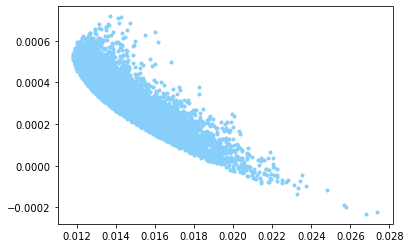

In [5]:
plt.plot(portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

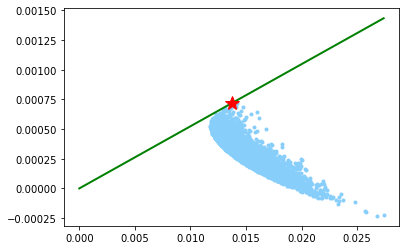

In [6]:
x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot( portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.plot(portfolio_standard_deviations[index],portfolio_means[index],color="red",marker="*",markersize = 15)
plt.show()

In [7]:
some_wights= pd.DataFrame({'AAPL': [0.40], 'MSFT': [0.30], 'INTC':[0.10], 'AMD':[0.10], 'CSCO':[0.10] }, index = [three_years.last_valid_index()])
some_wights

,AAPL,MSFT,INTC,AMD,CSCO
2013-12-31,0.4,0.3,0.1,0.1,0.1


In [8]:
capital = 10000
allocations = capital*some_wights
allocations

,AAPL,MSFT,INTC,AMD,CSCO
2013-12-31,4000.0,3000.0,1000.0,1000.0,1000.0


In [9]:
print(df['Close_AAPL'].loc[some_wights.last_valid_index()])
print(df['Close_MSFT'].loc[some_wights.last_valid_index()])
print(df['Close_INTC'].loc[some_wights.last_valid_index()])
print(df['Close_AMD'].loc[some_wights.last_valid_index()])
print(df['Close_CSCO'].loc[some_wights.last_valid_index()])

no_of_shares = allocations /df[[f'Open_{sym}' for sym in some_wights.columns]].loc[some_wights.index[0]].values
no_of_shares

20.036428451538086
37.40999984741211
25.959999084472656
3.869999885559082
22.43000030517578


,AAPL,MSFT,INTC,AMD,CSCO
2013-12-31,202.104043,80.2139,38.744673,258.39794,44.94382


In [10]:
seven_years = df.loc['2013-12-31':] 
seven_years['Open'] = seven_years['Open_AAPL']*no_of_shares['AAPL'].iloc[0] + seven_years['Open_MSFT']*no_of_shares['MSFT'].iloc[0] + seven_years['Open_INTC']*no_of_shares['INTC'].iloc[0]+  seven_years['Open_AMD']*no_of_shares['AMD'].iloc[0]+ seven_years['Open_CSCO']*no_of_shares['CSCO'].iloc[0]
seven_years['Close'] = seven_years['Close_AAPL']*no_of_shares['AAPL'].iloc[0] + seven_years['Close_MSFT']*no_of_shares['MSFT'].iloc[0]+ seven_years['Close_INTC']*no_of_shares['INTC'].iloc[0]+ seven_years['Close_AMD']*no_of_shares['AMD'].iloc[0]+ seven_years['Close_CSCO']*no_of_shares['CSCO'].iloc[0]
seven_years = seven_years[['Open','Close']]
seven_years

,Open,Close
Date,,
2013-12-31,10000.000000,10064.146781
2014-01-02,9996.962454,9981.902721
2014-01-03,9997.671731,9885.784268
2014-01-06,9856.789363,9867.052191
2014-01-07,9915.749675,9892.873968
...,...,...
2021-10-25,90413.418671,90767.202991
2021-10-26,91318.147881,91197.074974
2021-10-27,91365.381511,91983.241330


Abslute Return of Our Portofolio:823.57%
CAGR of Our Portofolio: 184.22%
Information Ratio of Our Portofolio:1.23



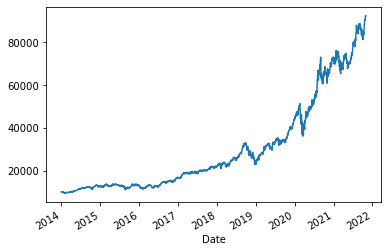

In [11]:
# Calculate the Absolute Return .
absolute_return = (seven_years['Close'].iloc[-1]-capital)/capital
# Calculate the CAGR .
CAGR = ((seven_years['Close'].iloc[-1]-capital)**(365/(df.index[-1] - df.index[0]).days))-1
# Calculate the IR .
information_ratio = (seven_years.Close.pct_change().mean()/seven_years.Close.pct_change().std())*((252) **0.5)


s=f"""Abslute Return of Our Portofolio:{absolute_return*100:.2f}%
CAGR of Our Portofolio: {CAGR*100:.2f}%
Information Ratio of Our Portofolio:{information_ratio:.2f}
"""
print(s)
axs = seven_years.Close.plot()

In [12]:
short_time = 5
long_time = 15
seven_years['Close_Short_Rolling']= seven_years['Close'].rolling(window = short_time).mean()
seven_years['Close_Long_Rolling']= seven_years['Close'].rolling(window = long_time).mean()
seven_years['Window_diff']=seven_years['Close_Long_Rolling'] - seven_years['Close_Short_Rolling']
seven_years['Open_1_change'] = seven_years['Open']-seven_years['Open'].shift(1)
seven_years = seven_years.dropna()
seven_years

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,Window_diff,Open_1_change
Date,,,,,,
2014-01-22,9877.743584,9818.350708,10005.955134,9921.354449,-84.600685,-123.182075
2014-01-23,9807.686708,9830.008080,9935.183237,9905.745202,-29.438035,-70.056876
2014-01-24,9903.724815,9749.857016,9856.443616,9890.275489,33.831873,96.038107
2014-01-27,9765.249922,9691.285697,9809.817898,9877.308917,67.491019,-138.474893
2014-01-28,9396.613015,9422.275340,9702.355368,9847.657127,145.301759,-368.636907
...,...,...,...,...,...,...
2021-10-25,90413.418671,90767.202991,90136.024254,86758.834382,-3377.189872,-409.127042
2021-10-26,91318.147881,91197.074974,90476.834734,87336.158409,-3140.676325,904.729210
2021-10-27,91365.381511,91983.241330,90959.347977,87901.285252,-3058.062725,47.233630


In [13]:
X = seven_years.copy()
y = np.where(X.Close.shift(-1) >= X.Close, 1,-1)
index = int(0.3*len(X))
X_train = X.iloc[:index]
X_test = X.iloc[index:]
y_train = y[:index]
y_test = y[index:]
logistic = LogisticRegression()
logistic = logistic.fit(X_train,y_train)
pd.DataFrame(zip(X.columns, np.transpose(logistic.coef_)))

,0,1
0,Open,[0.003137420334853734]
1,Close,[-0.0014211534103927648]
2,Close_Short_Rolling,[-0.0012055392275169552]
3,Close_Long_Rolling,[-0.0005070068019567938]
4,Window_diff,[0.0006985324255604353]
5,Open_1_change,[-0.0013085092255937466]


In [14]:
#
predictions = logistic.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
print(logistic.score(X_test,y_test))

[[260 334]
 [338 440]]
0.5102040816326531


In [15]:
results = X_test.copy()
results['C2C_Price']= X_test.Close.shift(-1) - X_test.Close
results['Predictions'] = predictions
results['True_Label']= y_test
results['Return']= results['C2C_Price']*results['Predictions']
results['Cum_Return']= results['Return'].cumsum()
results = results.dropna()
results

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,Window_diff,Open_1_change,C2C_Price,Predictions,True_Label,Return,Cum_Return
Date,,,,,,,,,,,
2016-05-20,12214.320206,12296.744861,12209.228129,12103.695550,-105.532579,-16.927621,59.489194,-1,1,-59.489194,-59.489194
2016-05-23,12330.294830,12356.234055,12226.518553,12115.886065,-110.632488,115.974624,296.728969,1,1,296.728969,237.239775
2016-05-24,12476.420202,12652.963024,12334.325783,12151.695234,-182.630549,146.125372,157.260608,-1,1,-157.260608,79.979167
2016-05-25,12739.042371,12810.223632,12454.669010,12203.417616,-251.251394,262.622169,68.369689,1,1,68.369689,148.348856
2016-05-26,12801.776454,12878.593321,12598.951779,12262.050045,-336.901734,62.734083,100.058132,1,1,100.058132,248.406988
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22,90822.545714,90204.186969,89771.268114,86125.470318,-3645.797796,1357.882031,563.016022,1,1,563.016022,61710.680819
2021-10-25,90413.418671,90767.202991,90136.024254,86758.834382,-3377.189872,-409.127042,429.871982,1,1,429.871982,62140.552802
2021-10-26,91318.147881,91197.074974,90476.834734,87336.158409,-3140.676325,904.729210,786.166356,1,1,786.166356,62926.719158


In [16]:
#Calculate the Abslute Return of Our Algorithmic Trading.
absolute_return_tf = (results['Close'].iloc[-1]-capital)/capital
#Calculate the CAGR of Our Algorithmic Trading.
CAGR_tf = ((results['Close'].iloc[-1]-capital)**(365/(df.index[-1] - df.index[0]).days))-1
#Calculate the IR Of Our Algorithmic Trading.
information_ratio_tf = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)


##Calculate the Abslute Return of Our buy-and-hold Trading. 
absolute_return_bh = (results.Close.iloc[-1]-results.Open.iloc[0])/results.Open.iloc[0]
#Calculate the CAGR of Our buy-and-hold Trading. 
CAGR_bh = ((results.Close.iloc[-1]/results.Open.iloc[0])**(252/len(df)))-1
#Calculate the IR Of Our buy-and-hold Trading .
information_ratio_bh = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)




s=f"""Abslute Return of Our Algorithmic Trading:{absolute_return_tf*100:.2f}%
Abslute Return of Our buy-and-hold Trading :{absolute_return_bh*100:.2f}%
CAGR of Our Algorithmic Trading: {CAGR_tf*100:.2f}%
CAGR of Our buy-and-hold Trading: {CAGR_bh*100:.2f}%
Information Ratio of Our Algorithmic Trading:{information_ratio_tf:.2f}
Information Ratio of Our buy-and-hold Trading:{information_ratio_bh:.2f}
"""

print(s)
results.Close.iplot()

((results.Close.pct_change().dropna()+1).cumprod()*capital).iplot()

Abslute Return of Our Algorithmic Trading:825.50%
Abslute Return of Our buy-and-hold Trading :657.72%
CAGR of Our Algorithmic Trading: 184.29%
CAGR of Our buy-and-hold Trading: 20.58%
Information Ratio of Our Algorithmic Trading:1.47
Information Ratio of Our buy-and-hold Trading:1.47

